In [1]:

import tensorflow
import numpy as np
np.random.seed(1212)
from tensorflow import keras 
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers


In [2]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt


path = "train/a/"
def hist_plot(path):
    valid_images = ["jpg","gif","png","tga","bmp"]
    results = [] 
    size = []
    y = []
    label = 0
    count=0
    for i in os.listdir(path):

            if i.split('.')[1] not in valid_images:
                continue # to loop over all images you have on the directory
            img = cv2.imread(path+i)
            gray = cv2.imread(path+i,0)
            corners = cv2.goodFeaturesToTrack(gray,4,0.2,2,useHarrisDetector=False)
            if len(corners) !=4:
                print(j)

            #img1 = img.crop((corners[1][0][0], corners[1][0][0], corners[1][0][1], corners[1][0][1])).convert('RGB')
            crners= np.unique(corners)
            crners.sort()
            size.append(img.shape[0])

            img = img[int(crners[0]):int(crners[1]), int(crners[0]):int(crners[1])]
            #img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            count+=1
            #img = cv2.resize(img, (150,150))
            #img = np.array(img)[:, :, ::-1]
            avg_color_per_row = np.average(img, axis=0)
            avg_color = np.average(avg_color_per_row, axis=0)
            results.append(avg_color)
    np_results = np.array(results) # to make results a numpy array
    plt.xlabel('intensity')
    plt.ylabel('count')
    plt.hist(np_results,color=['blue','green','red'])
    plt.show() # to show the histogram

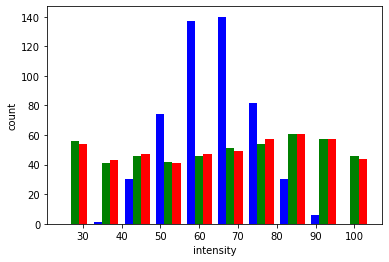

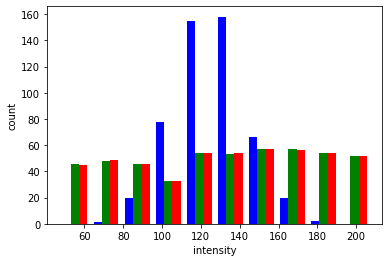

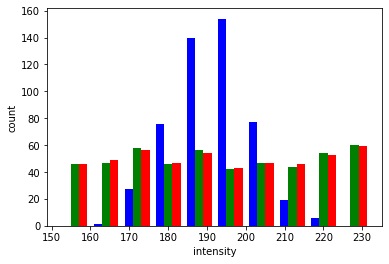

In [12]:
hist_plot('C:\\Users\\asus\\Documents\\case_study\\squares\\train\\/a/')
hist_plot('C:\\Users\\asus\\Documents\\case_study\\squares\\train\\/b/')
hist_plot('C:\\Users\\asus\\Documents\\case_study\\squares\\train\\/c/')


In [30]:

def create_data(path,images_fun=[],labels_fun=[],image_size=300):
    '''
    
    input is the path to the folder containing subdirectories
    
    output is the images in an array and labels ina an array
    if subdirectories are a,b,c label for images in the corresponding folders is 0,1,2
    
    '''
    IMAGE_SIZE = (image_size, image_size)
    valid_images = ["jpg","gif","png","tga","bmp"]
    label = 0
    rawImages=[]
    features=[]
    for i in os.listdir(path):
        if os.path.isdir(path + i):
            for j in os.listdir(path+i):
                if j.split('.')[1] not in valid_images:
                    continue
                #img = Image.open(path+i+'/'+j).convert('RGB')
                img = cv2.imread(path+i+'/'+j)
                gray = cv2.imread(path+i+'/'+j,0)
                corners = cv2.goodFeaturesToTrack(gray,4,0.2,2,useHarrisDetector=True)
                if len(corners) !=4:
                    print(j)

                #img1 = img.crop((corners[1][0][0], corners[1][0][0], corners[1][0][1], corners[1][0][1])).convert('RGB')
                crners= np.unique(corners)
                crners.sort()
                img = img[int(crners[0]):int(crners[1]), int(crners[0]):int(crners[1])]
                #image = cv2.imread(path+i+'/'+j)
                #image = np.array(img1)[:, :, ::-1]
                #image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Append the image and its corresponding label to the output

                #pixels = image_to_feature_vector(image)
                #hist = extract_color_histogram(image)
                #image = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
                image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                image = cv2.resize(image, IMAGE_SIZE,0,0,interpolation = cv2.INTER_NEAREST) 
                images_fun.append(image)
                labels_fun.append(label)
                # update the raw images, features, and labels matricies,
                # respectively
                #rawImages.append(pixels)
                #features.append(hist)
            label+=1
    images_fun = np.array(images_fun, dtype = 'float32')
    labels_fun = np.array(labels_fun, dtype = 'int32')   
    #output = []       
    #output.append((images, labels))
    return images_fun,labels_fun,rawImages,features

images,labels,rawImages,features = create_data('C:\\Users\\asus\\Documents\\case_study\\squares\\train\\',images_fun=[],labels_fun=[])
images_val,labels_val,raw_val,feat_val = create_data('C:\\Users\\asus\\Documents\\case_study\\squares\\val\\',images_fun=[],labels_fun=[])

In [31]:
train_images = images / 255.0 
test_images = images_val / 255.0
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [14]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [3]:
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.applications.vgg19 import VGG19

#model = resnet50.ResNet50(weights='imagenet', include_top=False)
model2 = VGG19(weights='imagenet',include_top= False,input_shape = (300,300,3))


In [32]:
train_features = model2.predict(train_images)
test_features = model2.predict(test_images)

In [33]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
numFeatures = x * y * z

In [45]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 15)

X = train_features.reshape((n_train, x*y*z))
X_test = test_features.reshape((n_train, x*y*z))

pca.fit(X)

C = pca.transform(X)
C_test = pca.transform(X_test)
C1 = C[:,0]
C2 = C[:,1]

In [46]:
sum(pca.explained_variance_ratio_)

0.9845805236836895

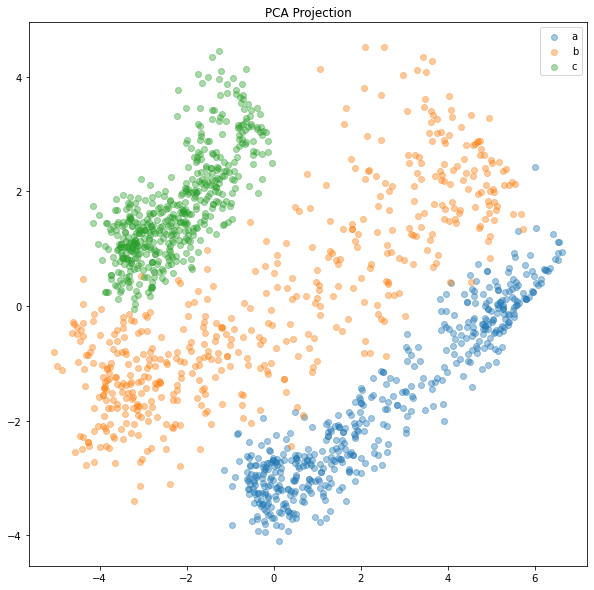

In [36]:
class_names =['a','b','c']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)



plt.subplots(figsize=(10,10))

for i, class_name in enumerate(class_names):
    plt.scatter(C1[labels == i][:1000], C2[labels == i][:1000], label = class_name, alpha=0.4)
plt.legend()
plt.title("PCA Projection")
plt.show()

### Connect FCN at the end of the VGG19

In [10]:
model2 = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.leaky_relu),
    tf.keras.layers.Dense(50, activation=tf.nn.leaky_relu),

    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, labels, batch_size=4, epochs=50)

Epoch 1/50


InternalError:  Blas GEMM launch failed : a.shape=(4, 8192), b.shape=(8192, 50), m=4, n=50, k=8192
	 [[node sequential/dense/MatMul (defined at \AppData\Local\Temp/ipykernel_21172/2864900339.py:12) ]] [Op:__inference_train_function_1366]

Function call stack:
train_function


## Connect SVM to the PCA components

In [47]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

svm_clf = SVC(C=5,kernel='rbf',tol=1e-7,gamma=0.3)
svm_clf.fit(C,labels)
import pandas as pd
svm = svm_clf.predict(C_test)
df_confusion = pd.crosstab(labels_val, svm,rownames=['actual'],colnames=['predicted'])
df_confusion

predicted,0,1,2
actual,,,
0,498,2,0
1,15,480,5
2,0,0,500


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_val,svm)

0.9846666666666667

## Error analysis

Islote the images causing problems and look at the histograms to see if there is any significant pattern

In [15]:
f = []
for j in os.listdir('C:\\Users\\asus\\Documents\\case_study\\squares\\val\\/a/'):
    f.append(j)

148.bmp


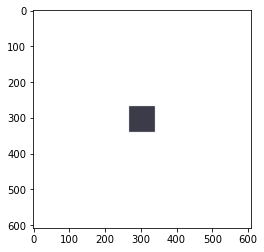

294.jpg


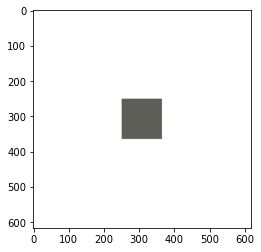

297.bmp


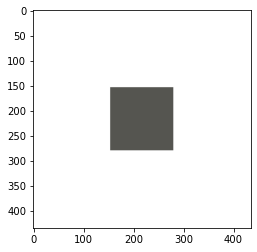

346.jpg


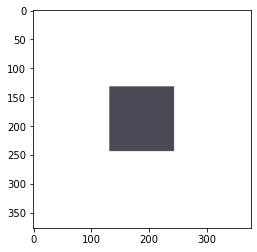

353.jpg


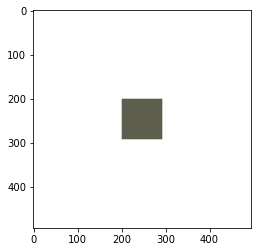

38.png


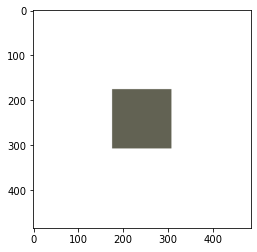

390.bmp


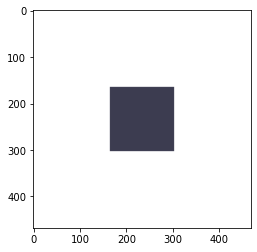

405.bmp


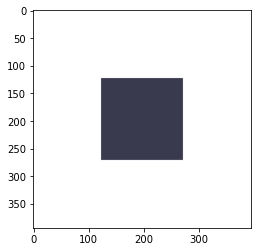

416.png


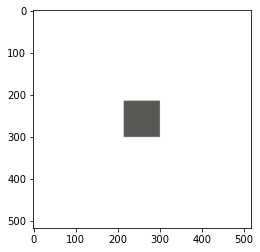

455.png


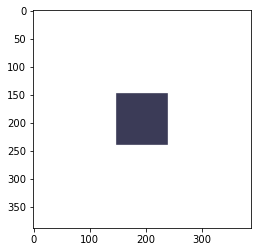

459.png


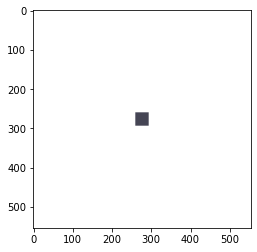

487.jpg


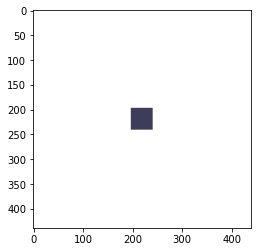

58.png


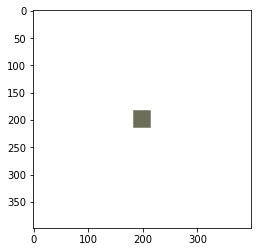

74.jpg


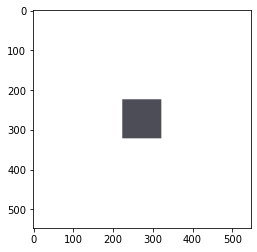

80.jpg


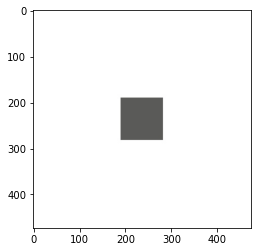

In [38]:
import glob
for i in np.where((labels_val!=svm) & (labels_val==1) & (svm==0))[0]:
    img_name = f[i-500]
    print(img_name)
    plt.imshow(cv2.imread('C:\\Users\\asus\\Documents\\case_study\\squares\\val\\/b/' + img_name)[:, :, ::-1])
    plt.show()

In [23]:
np.where((labels_val!=svm) & (labels_val==1) & (svm==0))

(array([555, 717, 720, 775, 783, 812, 824, 841, 853, 896, 900, 931, 954,
        979], dtype=int64),)

# Look at images where label is B but the model predicts A

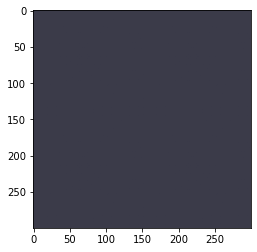

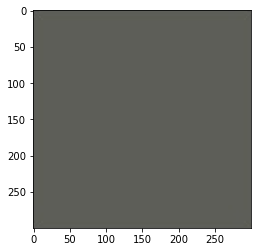

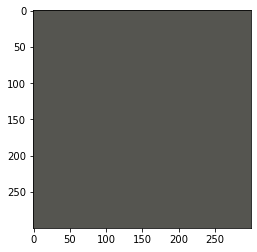

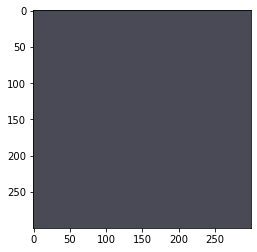

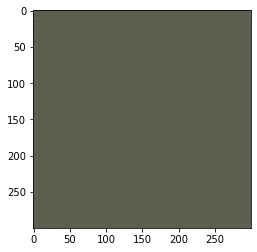

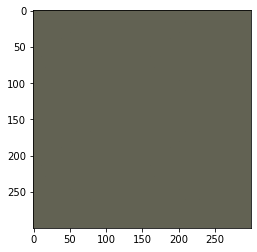

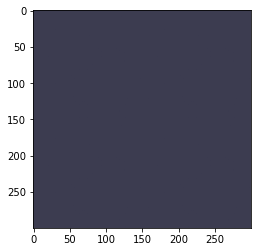

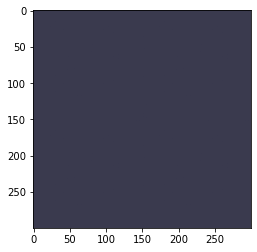

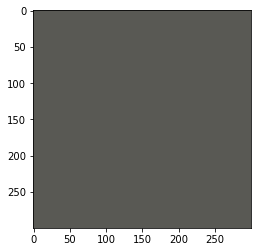

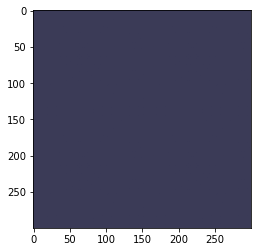

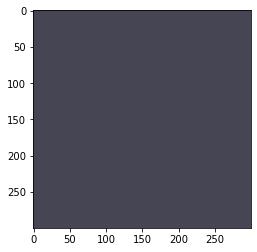

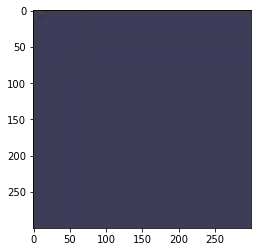

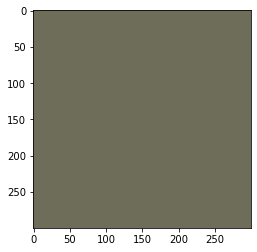

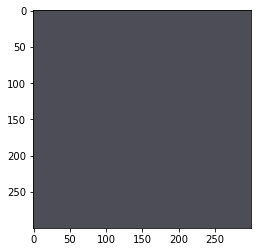

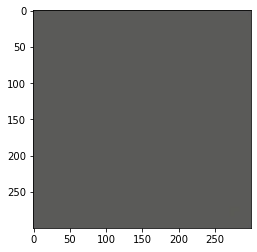

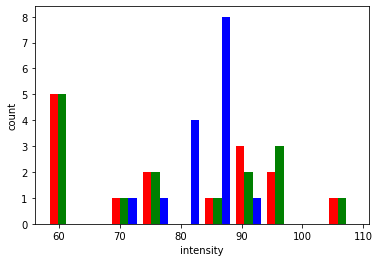

In [41]:
results2 = []
size = []
for i in np.where((labels_val!=svm) & (labels_val==1) & (svm==0))[0]:
    
    avg_color_per_row2 = np.average(images_val[i], axis=0)
    size.append(images_val[i].shape[0])
    avg_color2 = np.average(avg_color_per_row2, axis=0)
    results2.append(avg_color2)

    plt.imshow(test_images[i])
    plt.show()

    
plt.xlabel('intensity')
plt.ylabel('count')
np_results2 = np.array(results2) # to make results a numpy array
plt.hist(np_results2,color=['red','green','blue'])
plt.show() # to show the histogram

# Look at images where label is A but the model predicts B

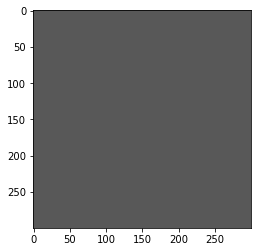

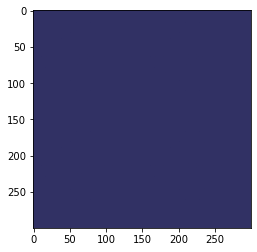

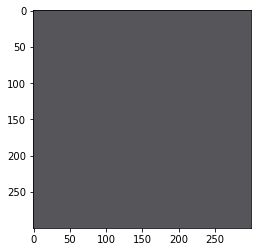

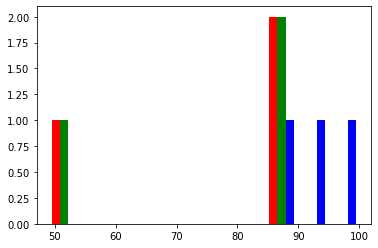

In [40]:
results2 = []
size = []
for i in np.where((labels_val!=svm) & (labels_val==0) & (svm==1))[0]:
    
    avg_color_per_row2 = np.average(images_val[i], axis=0)
    size.append(images_val[i].shape[0])
    avg_color2 = np.average(avg_color_per_row2, axis=0)
    results2.append(avg_color2)
    plt.imshow(test_images[i])
    plt.show()
plt.xlabel('intensity')
plt.ylabel('count')
np_results2 = np.array(results2) # to make results a numpy array
plt.hist(np_results2,color=['red','green','blue'])
plt.show() # to show the histogram

# Look at images where label is B but the model predicts C

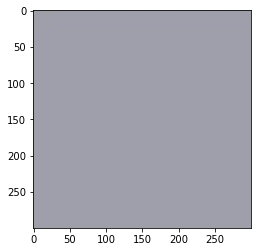

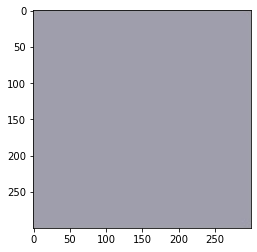

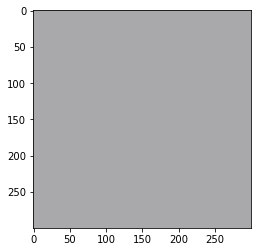

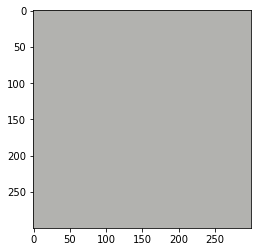

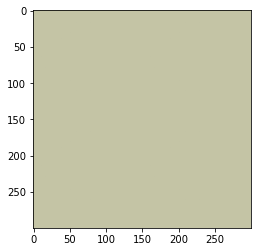

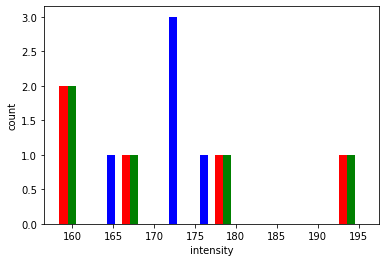

In [43]:
results2 = []
size = []
for i in np.where((labels_val!=svm) & (labels_val==1) & (svm==2))[0]:
    
    avg_color_per_row2 = np.average(images_val[i], axis=0)
    size.append(images_val[i].shape[0])
    avg_color2 = np.average(avg_color_per_row2, axis=0)
    results2.append(avg_color2)
    plt.imshow(test_images[i])
    plt.show()
plt.xlabel('intensity')
plt.ylabel('count')
np_results2 = np.array(results2) # to make results a numpy array
plt.hist(np_results2,color=['red','green','blue'])
plt.show() # to show the histogram